In [1]:
import pandas as pd
import numpy as np
import scipy
import os
import os.path
from matplotlib import cm
from IPython.display import display, HTML
import datetime as dt

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

sns.set(rc={'figure.figsize':(11.7,8.27)})

# Load and inspect the data

In [2]:
#zrh = pd.read_csv("homog_mo_SMA_data_prep.csv", sep=";")
zrh  = pd.read_csv("homog_mo_SMA.txt", delim_whitespace=True)
pp.ProfileReport(zrh)

# What is the overall trend in the temperature in Zürich? Is the trend the same in all months, or does it vary by month?

## Yearly trend

In [4]:
avg_year = zrh.groupby(["Year"]).mean().reset_index()
avg_year

Year  Month  Temperature  Precipitation
0    1864    6.5     6.691667      54.158333
1    1865    6.5     8.400000      55.683333
2    1866    6.5     8.758333     100.566667
3    1867    6.5     8.083333     108.491667
4    1868    6.5     9.191667      71.341667
5    1869    6.5     8.208333      81.258333
6    1870    6.5     7.375000      67.741667
7    1871    6.5     6.858333      64.358333
8    1872    6.5     8.808333      98.116667
9    1873    6.5     8.441667      86.983333
10   1874    6.5     7.875000      73.691667
11   1875    6.5     8.000000      91.783333
12   1876    6.5     8.341667     133.775000
13   1877    6.5     8.450000      77.766667
14   1878    6.5     7.616667      97.000000
15   1879    6.5     6.491667      84.258333
16   1880    6.5     8.391667      81.625000
17   1881    6.5     7.875000      79.500000
18   1882    6.5     8.141667      97.241667
19   1883    6.5     7.741667      77.016667
20   1884    6.5     8.358333      68.416667
21   1885    6.5     7.983333      86.641667
22   1886    6.5     8.091667      91.566667
23   1887    6.5     6.700000      71.858333
24   1888    6.5     7.025000     103.683333
25   1889    6.5     7.091667      81.200000
26   1890    6.5     6.833333      77.983333
27   1891    6.5     6.958333      99.458333
28   1892    6.5     7.991667      83.950000
29   1893    6.5     8.241667      66.800000
..    ...    ...          ...            ...
124  1988    6.5     9.416667     117.883333
125  1989    6.5     9.433333      79.175000
126  1990    6.5     9.700000      99.016667
127  1991    6.5     8.866667      77.008333
128  1992    6.5     9.500000      89.875000
129  1993    6.5     9.108333      97.800000
130  1994    6.5    10.466667      97.658333
131  1995    6.5     9.233333     110.275000
132  1996    6.5     8.125000      83.641667
133  1997    6.5     9.441667      82.158333
134  1998    6.5     9.491667      86.983333
135  1999    6.5     9.358333     129.083333
136  2000    6.5    10.166667      96.391667
137  2001    6.5     9.433333     123.575000
138  2002    6.5    10.191667     106.316667
139  2003    6.5    10.125000      71.600000
140  2004    6.5     9.450000      89.250000
141  2005    6.5     9.250000      86.825000
142  2006    6.5     9.750000      94.541667
143  2007    6.5    10.091667      96.075000
144  2008    6.5     9.625000     101.058333
145  2009    6.5     9.866667      91.525000
146  2010    6.5     8.808333      83.458333
147  2011    6.5    10.466667      76.125000
148  2012    6.5     9.708333     107.641667
149  2013    6.5     9.058333      91.150000
150  2014    6.5    10.608333      89.700000
151  2015    6.5    10.566667      76.500000
152  2016    6.5     9.900000     108.066667
153  2017    6.5    10.158333      92.225000

[154 rows x 4 columns]

Text(0, 0.5, 'Average Temperature')

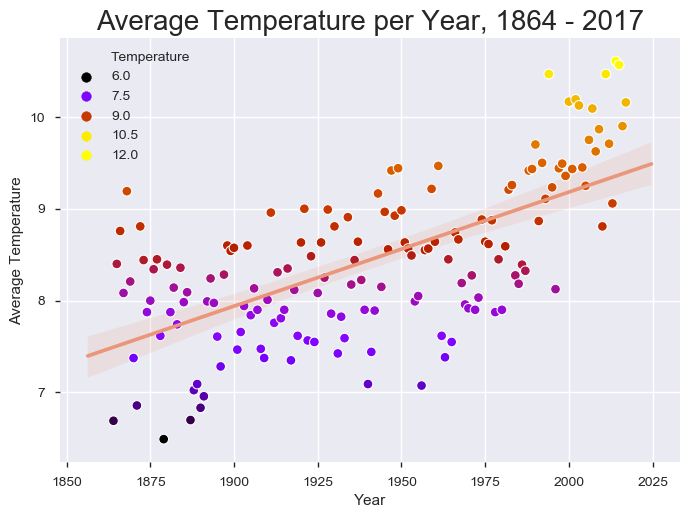

In [7]:
sns.regplot(x="Year", y="Temperature", data = avg_year, color = "darksalmon", scatter_kws = {"color" : "white"})
sns.scatterplot(x="Year", y="Temperature", data = avg_year, hue="Temperature", palette="gnuplot")
plt.title("Average Temperature per Year, 1864 - 2017", fontsize=20)
plt.ylabel("Average Temperature")

## Is the trend the same in all months, or does it vary by month?

In [10]:
avgmonth=zrh.groupby("Month")["Temperature"].mean().reset_index()
avgmonth

Month  Temperature
0       1    -0.784416
1       2     0.592208
2       3     4.198701
3       4     8.144805
4       5    12.413636
5       6    15.766883
6       7    17.699351
7       8    17.000649
8       9    13.668182
9      10     8.651948
10     11     3.657792
11     12     0.308442

In [11]:
avgmonth2=zrh.groupby(["Month"]).mean().reset_index()
avgmonth2

Month    Year  Temperature  Precipitation
0       1  1940.5    -0.784416      58.962987
1       2  1940.5     0.592208      58.116234
2       3  1940.5     4.198701      65.974026
3       4  1940.5     8.144805      81.066234
4       5  1940.5    12.413636     103.805195
5       6  1940.5    15.766883     124.387662
6       7  1940.5    17.699351     126.227922
7       8  1940.5    17.000649     122.740909
8       9  1940.5    13.668182      93.601948
9      10  1940.5     8.651948      81.320779
10     11  1940.5     3.657792      72.175974
11     12  1940.5     0.308442      70.540909

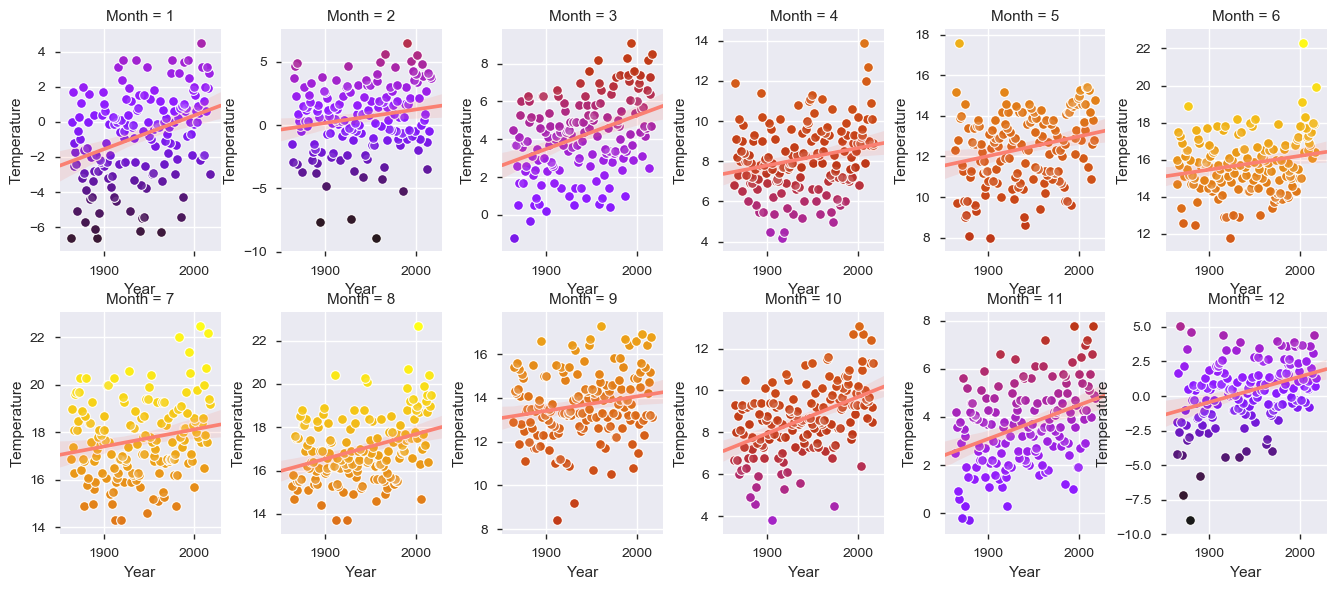

In [13]:
# Loop through month over years to get insight about trends in different months
grid_month = sns.FacetGrid(zrh, col = "Month",  height=3, col_wrap=6, hue="Temperature", palette="gnuplot", sharex=False, sharey=False, aspect=0.75, margin_titles = True)
grid_month = grid_month.map(sns.scatterplot, "Year", "Temperature")


for i in range(12):
    sns.regplot(x="Year", y="Temperature", data = zrh[zrh.Month == i+1], color = "salmon",
                scatter_kws = {"color" : "white","alpha" : 0.1}, line_kws = {"scalex" : "False"}, ax=grid_month.axes[i])


plt.savefig("month_temps.png", format = "png")



## How do precipitation levels compare between summer 2017 and the historical avg? Winter 2017? Spring, fall?

In [23]:
# Historical average - draw a line based on mean value
# Summer winter... add a new line in DF that specifies season
# Group by year, season, take the average
# Do separate scatter plot to add points.

In [18]:
preci = zrh.copy()
preci.head()

Year  Month  Temperature  Precipitation
0  1864      1         -6.6           25.7
1  1864      2         -1.5           32.9
2  1864      3          4.5           51.0
3  1864      4          6.8           46.9
4  1864      5         12.3           78.4

In [103]:
# Add seasons to the whole df

Season = []

for month in preci.Month:
    if month in [1,2,12]:
        Season.append("Winter")
    elif month in [3,4,5]:
        Season.append("Spring")
    elif month in [6,7,8]:
        Season.append("Summer")
    elif month in [9,10,11]:
        Season.append("Autumn")  


preci["Season"] = Season

In [104]:
preci.head(12)

Year  Month  Temperature  Precipitation  Season
0   1864      1         -6.6           25.7  Winter
1   1864      2         -1.5           32.9  Winter
2   1864      3          4.5           51.0  Spring
3   1864      4          6.8           46.9  Spring
4   1864      5         12.3           78.4  Spring
5   1864      6         14.7          146.4  Summer
6   1864      7         16.9           77.5  Summer
7   1864      8         15.3           31.3  Summer
8   1864      9         12.9           61.9  Autumn
9   1864     10          6.7           15.4  Autumn
10  1864     11          2.5           78.5  Autumn
11  1864     12         -4.2            4.0  Winter

In [105]:
# Create a copy to get averages for different seasons

preci_copy = preci.copy()
preci_copy.head()


Year  Month  Temperature  Precipitation  Season
0  1864      1         -6.6           25.7  Winter
1  1864      2         -1.5           32.9  Winter
2  1864      3          4.5           51.0  Spring
3  1864      4          6.8           46.9  Spring
4  1864      5         12.3           78.4  Spring

In [113]:
preci_season = preci_copy.groupby(["Season", "Year"]).mean().reset_index()
preci_season.head()

Season  Year  Month  Temperature  Precipitation
0  Autumn  1864     10     7.366667      51.933333
1  Autumn  1865     10     9.633333      43.800000
2  Autumn  1866     10     8.633333      72.066667
3  Autumn  1867     10     7.266667     100.566667
4  Autumn  1868     10     8.333333      94.366667

In [107]:
sort=[]
for season in preci_season.Season:
    if season is "Winter":
        sort.append(1)
    elif season is "Spring":
        sort.append(2)
    elif season is "Summer":
        sort.append(3)
    elif season is "Autumn":
        sort.append(4)        
        
preci_season["sorting"] = sort

In [108]:
preci_season.sample(n=30)

Season  Year  Month  Temperature  Precipitation  sorting
339  Summer  1895      7    16.866667      80.733333        3
598  Winter  2000      5     2.533333      67.900000        1
0    Autumn  1864     10     7.366667      51.933333        4
142  Autumn  2006     10    12.200000      71.766667        4
163  Spring  1873      4     7.433333     126.000000        2
488  Winter  1890      5    -3.066667      33.700000        1
151  Autumn  2015     10    10.066667      50.400000        4
263  Spring  1973      4     7.033333      66.500000        2
42   Autumn  1906     10     9.333333      33.966667        4
85   Autumn  1949     10    10.400000      49.700000        4
296  Spring  2006      4     8.400000     169.966667        2
222  Spring  1932      4     6.400000      97.266667        2
559  Winter  1961      5     1.866667      82.833333        1
187  Spring  1897      4     8.066667     103.933333        2
613  Winter  2015      5     1.933333      45.500000        1
25   Autumn  1889     10     7.266667      91.933333        4
377  Summer  1933      7    16.433333     116.633333        3
110  Autumn  1974     10     7.300000     107.966667        4
555  Winter  1957      5     1.000000      70.866667        1
494  Winter  1896      5    -1.533333      24.933333        1
160  Spring  1870      4     7.900000      43.100000        2
171  Spring  1881      4     7.700000      71.966667        2
207  Spring  1917      4     6.933333      73.600000        2
321  Summer  1877      7    17.966667     101.933333        3
330  Summer  1886      7    16.066667     170.133333        3
211  Spring  1921      4     8.600000      55.500000        2
374  Summer  1930      7    16.800000     155.966667        3
566  Winter  1968      5    -0.366667      81.033333        1
556  Winter  1958      5     1.933333     109.000000        1
242  Spring  1952      4     9.533333      91.866667        2

In [109]:
y2017season = preci_season[preci_season.Year==2017]
y2017season.head()

Season  Year  Month  Temperature  Precipitation  sorting
153  Autumn  2017     10     9.733333      78.366667        4
307  Spring  2017      4    10.700000      85.166667        2
461  Summer  2017      7    19.533333     119.866667        3
615  Winter  2017      5     0.666667      85.500000        1

In [110]:
preci_season[preci_season.Season=="Spring"]["Precipitation"].mean()

83.6151515151515

In [111]:
y2017season[y2017season.Season=="Spring"]["Year"]
y2017season[y2017season.Season=="Spring"]["Precipitation"]

307    85.166667
Name: Precipitation, dtype: float64

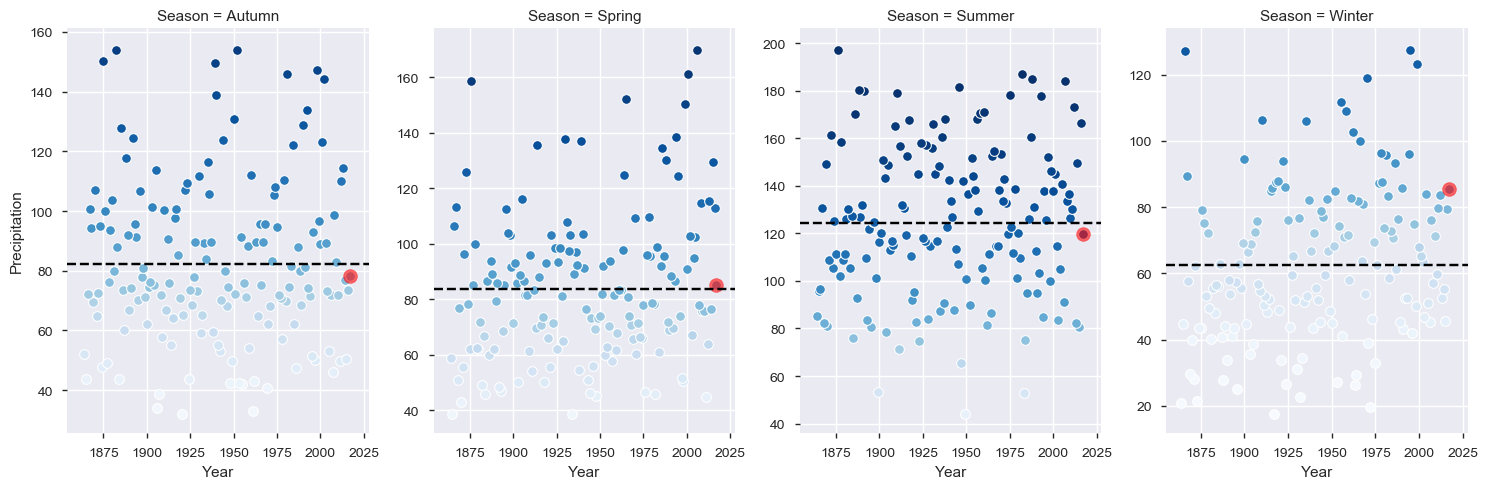

In [112]:
# Loop through season over years to get insight about trends in different seasons

grid_season = sns.FacetGrid(preci_season, col = "Season",  height=5, hue="Precipitation", palette="Blues", col_wrap=4, sharex=False, sharey=False, aspect=0.75, margin_titles = True)
grid_season = grid_season.map(sns.scatterplot, "Year", "Precipitation")

for axe,season in zip(range(4),y2017season.Season):
    grid_season.axes[axe].scatter(x=y2017season[y2017season.Season==season]["Year"], y=y2017season[y2017season.Season==season]["Precipitation"], alpha=0.6, color="red", s=100)
    grid_season.axes[axe].axhline(preci_season[preci_season.Season==season]["Precipitation"].mean(),linestyle='--',color='black')    

    
plt.savefig("season_precip.png", format = "png")